In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3";


%load_ext autoreload
%autoreload 2
from CW import CW
from FGSM import FGSM
from OPT_attack import OPT_attack
from OPT_attack_polar import OPT_attack_polar
from OPT_attack_polar_GD import OPT_attack_polar_GD
from OPT_attack_lsq import OPT_attack_lsq
from OPT_attack_polar_lsq import OPT_attack_polar_lsq
from OPT_attack_GD import OPT_attack_GD
from OPT_genattack import OPT_genattack
from OPT_attack_sign_SGD import OPT_attack_sign_SGD
from OPT_attack_sign_SGD_lf import OPT_attack_sign_SGD_lf
from ZOO import ZOO
from OPT_attack_lf import OPT_attack_lf
from nes_attack import NES
from models import PytorchModel
import torch
from allmodels import MNIST, load_model, load_mnist_data, load_cifar10_data, CIFAR10
import os
import numpy as np
import matplotlib.pyplot as plt

Files already downloaded and verified
Files already downloaded and verified
tensor([3])
tensor([8])
tensor([8])
tensor([0])
tensor([6])
tensor([6])
tensor([1])
tensor([6])
tensor([3])
tensor([1])
tensor([0])
tensor([9])
tensor([5])
tensor([7])
tensor([9])
tensor([8])
tensor([5])
tensor([7])


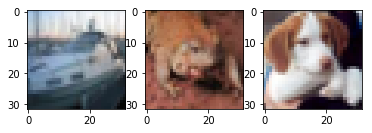

In [2]:
net = CIFAR10()
net.cuda()
net = torch.nn.DataParallel(net, device_ids=[0])
# print(net)
load_model(net,'cifar10_gpu.pt')
net.eval()
model = net.module if torch.cuda.is_available() else net
# model = model.cpu()
train_loader, test_loader, train_dataset, test_dataset = load_cifar10_data()

X0, Y0 = None, None
X1, Y1 = None, None
X2, Y2 = None, None
for i, (xi,yi) in enumerate(test_loader):
    print(yi)
    if i==2:
        X0, Y0 = xi, yi
    if i==5:
        X1, Y1 = xi, yi
    if i==16:
        X2, Y2 = xi, yi
    if i==17:
        break
amodel = PytorchModel(model, bounds=[0,1], num_classes=10)

def plot_adv(X, adv):
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(X[0].numpy(), (1, 2, 0)))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(adv.cpu()[0].numpy(), (1, 2, 0)))
    plt.show()

# Plot the sample images
plt.subplot(1,3,1)
plt.imshow(np.transpose(X0[0].numpy(), (1, 2, 0)))
plt.subplot(1,3,2)
plt.imshow(np.transpose(X1[0].numpy(), (1, 2, 0)))
plt.subplot(1,3,3)
plt.imshow(np.transpose(X2[0].numpy(), (1, 2, 0)))
plt.show()

### Untargeted

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Searching for the initial direction on 100 random directions: 
--------> Found distortion 2.1361
--------> Found distortion 0.5923
--------> Found distortion 0.2809
--------> Found distortion 0.2777
--------> Found distortion 0.1827
--------> Found distortion 0.1551
==========> Found best distortion 0.1551 in 0.5155 seconds using 292 queries
Iteration  10 distortion 0.0457 num_queries 1142
Iteration  20 distortion 0.0293 num_queries 2190
Iteration  30 distortion 0.0280 num_queries 2880
Iteration  40 distortion 0.0260 num_queries 3629
Iteration  50 distortion 0.0254 num_queries 4777
Iteration  60 distortion 0.0246 num_queries 5932
Iteration  70 distortion 0.0231 num_queries 7008
Iteration  80 distortion 0.0225 num_queries 8753
Iteration  90 distortion 0.0221 num_queries 10413
Iteration 100 distortion 0.0219 num_queries 11929
Iteration 110 distortion 0.0217 num_queries 13515
Iteration 120 distortion 0.0217 num_queries 15015
Iteration 130 distortion 0.0214 num_queries 16790
Iteration 140 

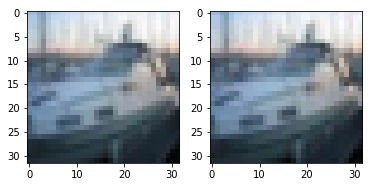

In [29]:
attack = OPT_attack_lf(amodel)
adv, dist = attack(X0.cuda(), Y0.cuda(), seed=11)
plot_adv(X0, adv)

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Searching for the initial direction on 100 random directions: 
--------> Found distortion 2.1361
--------> Found distortion 0.5923
--------> Found distortion 0.2809
--------> Found distortion 0.2777
--------> Found distortion 0.1827
--------> Found distortion 0.1551
==========> Found best distortion 0.1551 in 0.5028 seconds using 292 queries
Iteration   1 distortion 0.0480 num_queries 773
Iteration   6 distortion 0.0269 num_queries 2168
Iteration  11 distortion 0.0216 num_queries 3531
Iteration  16 distortion 0.0190 num_queries 4839
Iteration  21 distortion 0.0185 num_queries 6319
Iteration  26 distortion 0.0178 num_queries 7716
Iteration  31 distortion 0.0173 num_queries 8941
Iteration  36 distortion 0.0166 num_queries 10426
Iteration  41 distortion 0.0163 num_queries 11734
Iteration  46 distortion 0.0160 num_queries 13368
Iteration  51 distortion 0.0159 num_queries 14771
Iteration  56 distortion 0.0159 num_queries 16221
Iteration  61 distortion 0.0157 num_queries 17941
Iteration  66 

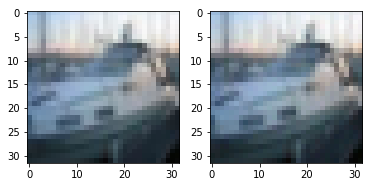

In [30]:
attack = OPT_attack_sign_SGD_lf(amodel)
adv_sign, dist_sign = attack(X0.cuda(), Y0.cuda(), seed=11)
plot_adv(X0, adv_sign)

### Targeted

Targeted attack - Source: 8 and Target: 4 Seed: 10
Searching for the initial direction on 100 samples: 
--------> Found distortion 0.4366
--------> Found distortion 0.3898
--------> Found distortion 0.3020


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


--------> Found distortion 0.2781
--------> Found distortion 0.2603
--------> Found distortion 0.2519
==========> Found best distortion 0.2519 in 1.9375 seconds using 1190 queries
Iteration  10 distortion 0.1334 num_queries 6107
Iteration  20 distortion 0.1053 num_queries 9350
Iteration  30 distortion 0.0906 num_queries 11742
Iteration  40 distortion 0.0877 num_queries 14102
Iteration  50 distortion 0.0833 num_queries 16361
Iteration  60 distortion 0.0803 num_queries 18631
Iteration  70 distortion 0.0739 num_queries 21039
Iteration  80 distortion 0.0721 num_queries 23333
Iteration  90 distortion 0.0709 num_queries 25661
Iteration 100 distortion 0.0699 num_queries 27983
Iteration 110 distortion 0.0688 num_queries 30356
Iteration 120 distortion 0.0682 num_queries 32682
Iteration 130 distortion 0.0666 num_queries 34936
Iteration 140 distortion 0.0663 num_queries 37465
Iteration 150 distortion 0.0658 num_queries 40496
Iteration 160 distortion 0.0652 num_queries 43503
Iteration 170 distorti

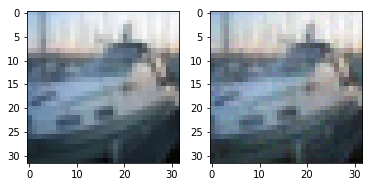

In [31]:
attack = OPT_attack_lf(amodel, train_dataset=train_dataset)
target = 4
adv, dist = attack(X0.cuda(), Y0.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=10)
plot_adv(X0, adv)

Targeted attack - Source: 8 and Target: 4 Seed: 10
Searching for the initial direction on 100 samples: 
--------> Found distortion 0.4366
--------> Found distortion 0.3898
--------> Found distortion 0.3020


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


--------> Found distortion 0.2781
--------> Found distortion 0.2603
--------> Found distortion 0.2519
==========> Found best distortion 0.2519 in 2.0450 seconds using 1190 queries
Iteration   1 distortion 0.1826 num_queries 1555
Iteration   6 distortion 0.1002 num_queries 3481
Iteration  11 distortion 0.0793 num_queries 4740
Iteration  16 distortion 0.0677 num_queries 5923
Iteration  21 distortion 0.0640 num_queries 7152
Iteration  26 distortion 0.0603 num_queries 8384
Iteration  31 distortion 0.0574 num_queries 9494
Iteration  36 distortion 0.0554 num_queries 10645
Iteration  41 distortion 0.0534 num_queries 11825
Iteration  46 distortion 0.0525 num_queries 13021
Iteration  51 distortion 0.0515 num_queries 14155
Iteration  56 distortion 0.0504 num_queries 15316
Iteration  61 distortion 0.0499 num_queries 16487
Iteration  66 distortion 0.0492 num_queries 17675
Iteration  71 distortion 0.0490 num_queries 18774
Iteration  76 distortion 0.0489 num_queries 19882
Iteration  81 distortion 0.

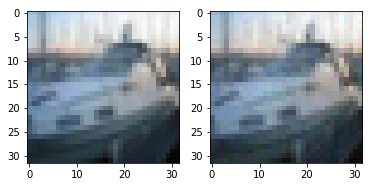

In [32]:
attack = OPT_attack_sign_SGD_lf(amodel, train_dataset=train_dataset)
target = 4
adv_sign, dist_sign = attack(X0.cuda(), Y0.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=10)
plot_adv(X0, adv_sign)